<a href="https://colab.research.google.com/github/AydenRU/neural_networks-/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [59]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from tensorflow import keras
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2. Разделяем данные на обучающую и тестовую выборку

In [4]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## 1.3. Визуализируем часть данных из датасета

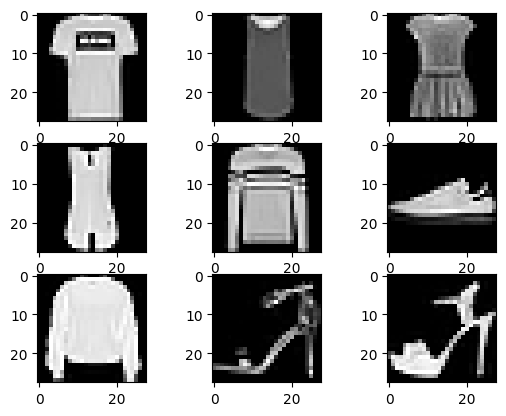

In [5]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [6]:
# Ваш код
x_train = trainX / 255
x_test = testX / 255
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

y_train = keras.utils.to_categorical(trainy, 10)
y_test = keras.utils.to_categorical(testy, 10)



print( x_train.shape )

(60000, 28, 28, 1)


In [7]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [8]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [10]:
EPOCH = 5

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
from keras.callbacks import ModelCheckpoint

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True)

## 1.5. Обучаем модель

In [13]:
# Ваш код
his = model.fit(x_train, y_train, batch_size=32, epochs=EPOCH, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/5
1500/1500 [==============================] - 79s 51ms/step - loss: 0.4227 - accuracy: 0.8471 - val_loss: 0.3276 - val_accuracy: 0.8817
Epoch 2/5
   3/1500 [..............................] - ETA: 52s - loss: 0.3774 - accuracy: 0.8542

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 70s 47ms/step - loss: 0.2806 - accuracy: 0.8979 - val_loss: 0.2750 - val_accuracy: 0.9025
Epoch 3/5
1500/1500 [==============================] - 71s 47ms/step - loss: 0.2290 - accuracy: 0.9157 - val_loss: 0.2431 - val_accuracy: 0.9101
Epoch 4/5
1500/1500 [==============================] - 70s 47ms/step - loss: 0.1971 - accuracy: 0.9277 - val_loss: 0.2656 - val_accuracy: 0.9020
Epoch 5/5
1500/1500 [==============================] - 71s 48ms/step - loss: 0.1685 - accuracy: 0.9367 - val_loss: 0.2270 - val_accuracy: 0.9193


In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2398 - accuracy: 0.9123


[0.23977656662464142, 0.9122999906539917]

In [5]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

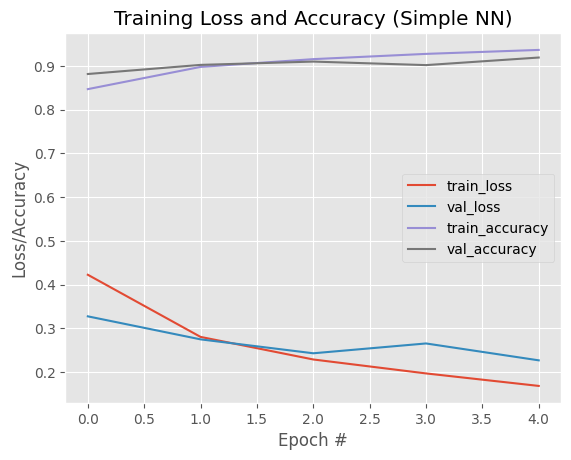

In [17]:
# Ваш код
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.plot(N, his.history["accuracy"], label="train_accuracy")
plt.plot(N, his.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [18]:
model.save("best_model_work_3.h5", save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [7]:
!pip install gradio

In [6]:
import cv2
from google.colab.patches import cv2_imshow

In [29]:
def predict_image(img, model_path = "/content/best_model_work_3.h5"):

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras

    # Делаем предсказание на изображении
    img = cv2.resize(img, (28, 28)) # Изменение разрешения изображения
    cv2_imshow(img)
    img = np.invert(img)
    cv2_imshow(img)
    img = img / 255.0
    img = img.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)
    preds = model.predict(img)
    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {class_names[i]: preds[0][i] for i in range(10)}

    return confidences

In [8]:
import gradio as gr

In [30]:
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение", image_mode="L"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(class_names)), # Выходные данные: топ-N классов с наибольшей вероятностью
)

In [31]:
interface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://1dbc5e8eba9cef851c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 94ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://1dbc5e8eba9cef851c.gradio.live


# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [60]:
# Ваш код
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import random
import pickle
import cv2
import os
from google.colab.patches import cv2_imshow

In [62]:
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Задание_2/dataset/train")))
random.shuffle(imagePaths)

In [64]:
def load_images(imagePaths, compression_size = 32):
  data = []
  labels = []

  for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size)).flatten()
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

In [66]:
data = load_images(imagePaths)

KeyboardInterrupt: 

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=4)

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [ ]:
# Ваш код

## 2.3. Сохраните полученные модели

In [ ]:
# Ваш код

## 2.4. Загрузите обученную модель из прошлой практической работы


In [ ]:
# Ваш код


## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

In [ ]:
# Ваш код

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [41]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [42]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [43]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64, 1))
test = test.reshape((test.shape[0], 64, 64, 1))

test.shape

(80, 64, 64, 1)

### 3.1.2. Отрисуйте несколько примеров

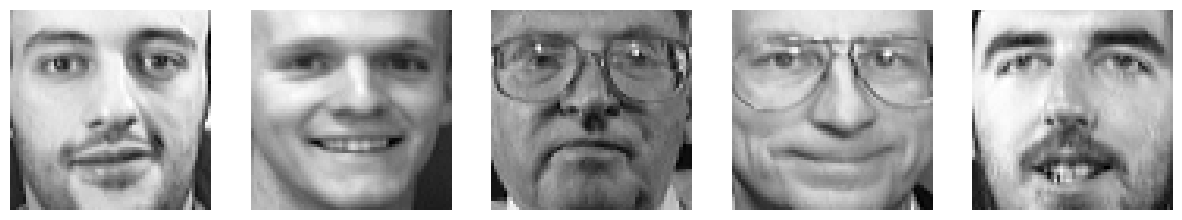

In [44]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [45]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [46]:
X_train.shape

(320, 32, 64, 1)

Вот один пример обучающей пары.

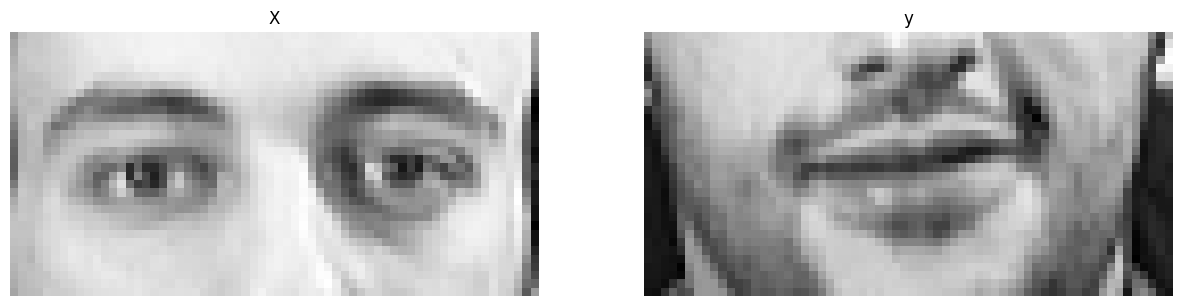

In [47]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [48]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [49]:
# Ваш код здесь
model = Sequential([
    Conv2D(512,(6,6),activation = 'relu', padding='Same', input_shape = (32, 64, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(256,(6,6),activation = 'relu', padding='Same'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128,(6,6), activation = 'relu', padding='Same'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64,(6,6), activation = 'relu', padding='Same'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32,(6,6), activation = 'relu', padding='Same'),
    Flatten(),
    Dense(4096,activation = 'relu'),
    Dense(3192,activation = 'relu'),
    Dense(2048,activation = 'linear')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 64, 512)       18944     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 32, 512)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 32, 256)       4718848   
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 16, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 16, 128)        1179776   
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 8, 128)        

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [50]:
# Ваш код здесь
from keras.optimizers import Adam

In [51]:
opt = Adam(learning_rate=0.0001, use_ema=True)
model.compile(optimizer=opt,
             loss='mean_squared_error',
             metrics=['mae'])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [52]:
# Ваш код здесь
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath="best_model_work_3(2).h5",
                             monitor="val_mae",
                             save_best_only=True,
                             verbose=0)
early_stopping = EarlyStopping(patience=5)

In [53]:
# Ваш код здесь
EPOCH = 20

his = model.fit(X_train, y_train_n, batch_size=10, epochs=EPOCH, validation_split=0.2, callbacks=[checkpoint, early_stopping])

model.evaluate(X_test, y_test_n)

Epoch 1/20
26/26 [==============================] - ETA: 0s - loss: 0.1354 - mae: 0.2947

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/26 [==============================] - 136s 5s/step - loss: 0.1354 - mae: 0.2947 - val_loss: 0.0254 - val_mae: 0.1281
Epoch 2/20
26/26 [==============================] - 131s 5s/step - loss: 0.0213 - mae: 0.1151 - val_loss: 0.0205 - val_mae: 0.1157
Epoch 3/20
26/26 [==============================] - 130s 5s/step - loss: 0.0193 - mae: 0.1095 - val_loss: 0.0202 - val_mae: 0.1144
Epoch 4/20
26/26 [==============================] - 132s 5s/step - loss: 0.0200 - mae: 0.1121 - val_loss: 0.0227 - val_mae: 0.1169
Epoch 5/20
26/26 [==============================] - 135s 5s/step - loss: 0.0191 - mae: 0.1087 - val_loss: 0.0201 - val_mae: 0.1143
Epoch 6/20
26/26 [==============================] - 128s 5s/step - loss: 0.0196 - mae: 0.1110 - val_loss: 0.0228 - val_mae: 0.1173
Epoch 7/20
26/26 [==============================] - 127s 5s/step - loss: 0.0201 - mae: 0.1122 - val_loss: 0.0228 - val_mae: 0.1236
Epoch 8/20
26/26 [==============================] - 124s 5s/step - loss: 0.0196 - mae: 0.1109 

[0.016218258067965508, 0.10085535049438477]

## 3.5. Сделайте предсказания на тестовых данных

In [54]:
from keras.models import load_model

model = load_model("/content/best_model_work_3(2).h5")

In [55]:
preds = model.predict(X_test)

3/3 [==============================] - 8s 2s/step


## 3.6. Посчитайте метрику качества на тестовых данных

In [56]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

0.101089254

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [57]:
# Ваш код здесь
pred_test = preds.reshape(-1, 32, 64, 1)

Отрисуйте все предсказания.

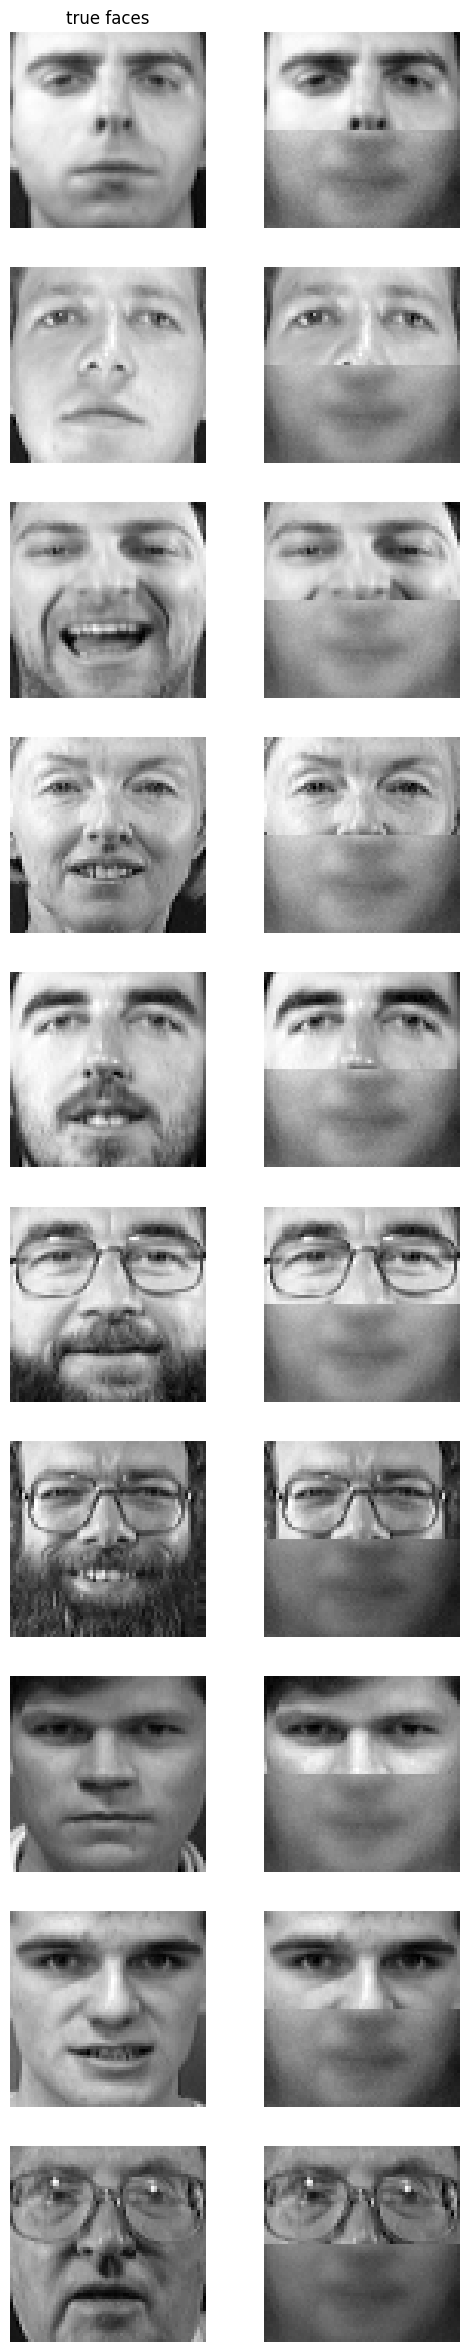

In [58]:
# Пример кода:

n_faces = 10
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(10):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )